In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('output_demo/lc2.csv')
df

,id,day,mu,sigma
0,1,4194,0.539525,2.635086
1,1,4196,0.561529,2.637109
2,54,5731,0.099747,1.667122
3,54,5745,0.178624,1.636589
4,54,5914,0.577268,1.203087
...,...,...,...,...
3984,138,6439,-4.780332,1.065601
3985,138,6440,-4.777839,1.063562
3986,138,6496,-4.633254,1.000804
3987,138,6510,-4.716345,0.985048


In [17]:
df = df[df['id'] != '_handicap19_1_']
df = df[df['id'] != '_komi19_0_']
df = df[df['id'] != '_komi19_1_']

In [18]:
df['id'].value_counts().head(n=10)

14     116
7      112
18     111
15      92
35      92
27      91
50      86
126     72
53      72
16      70
Name: id, dtype: int64

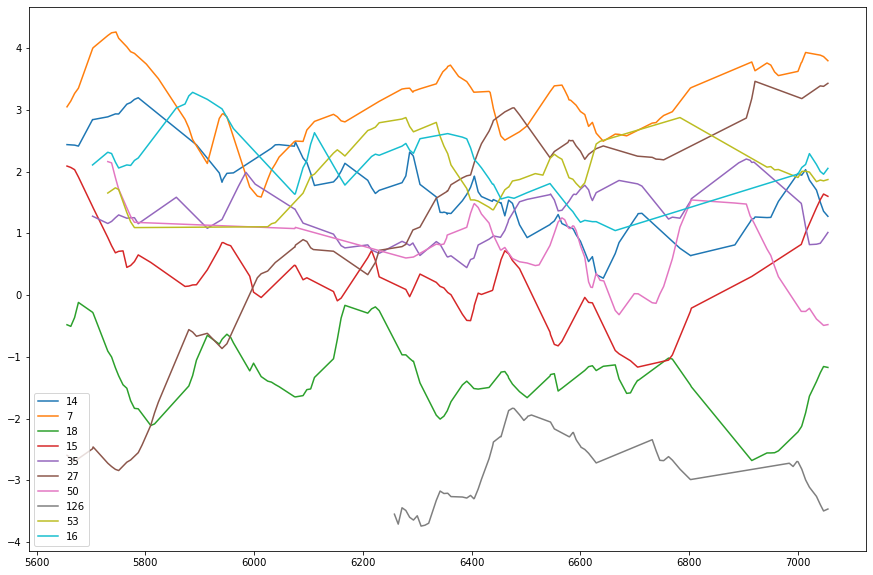

In [27]:
plt.figure(figsize=(15,10))
for id in (df['id'].value_counts().head(n=10).keys()): # df['id'].unique():
    lc_id = df[df['id'] == id]
    plt.plot(lc_id['day'], lc_id['mu'], label = id)
plt.legend()

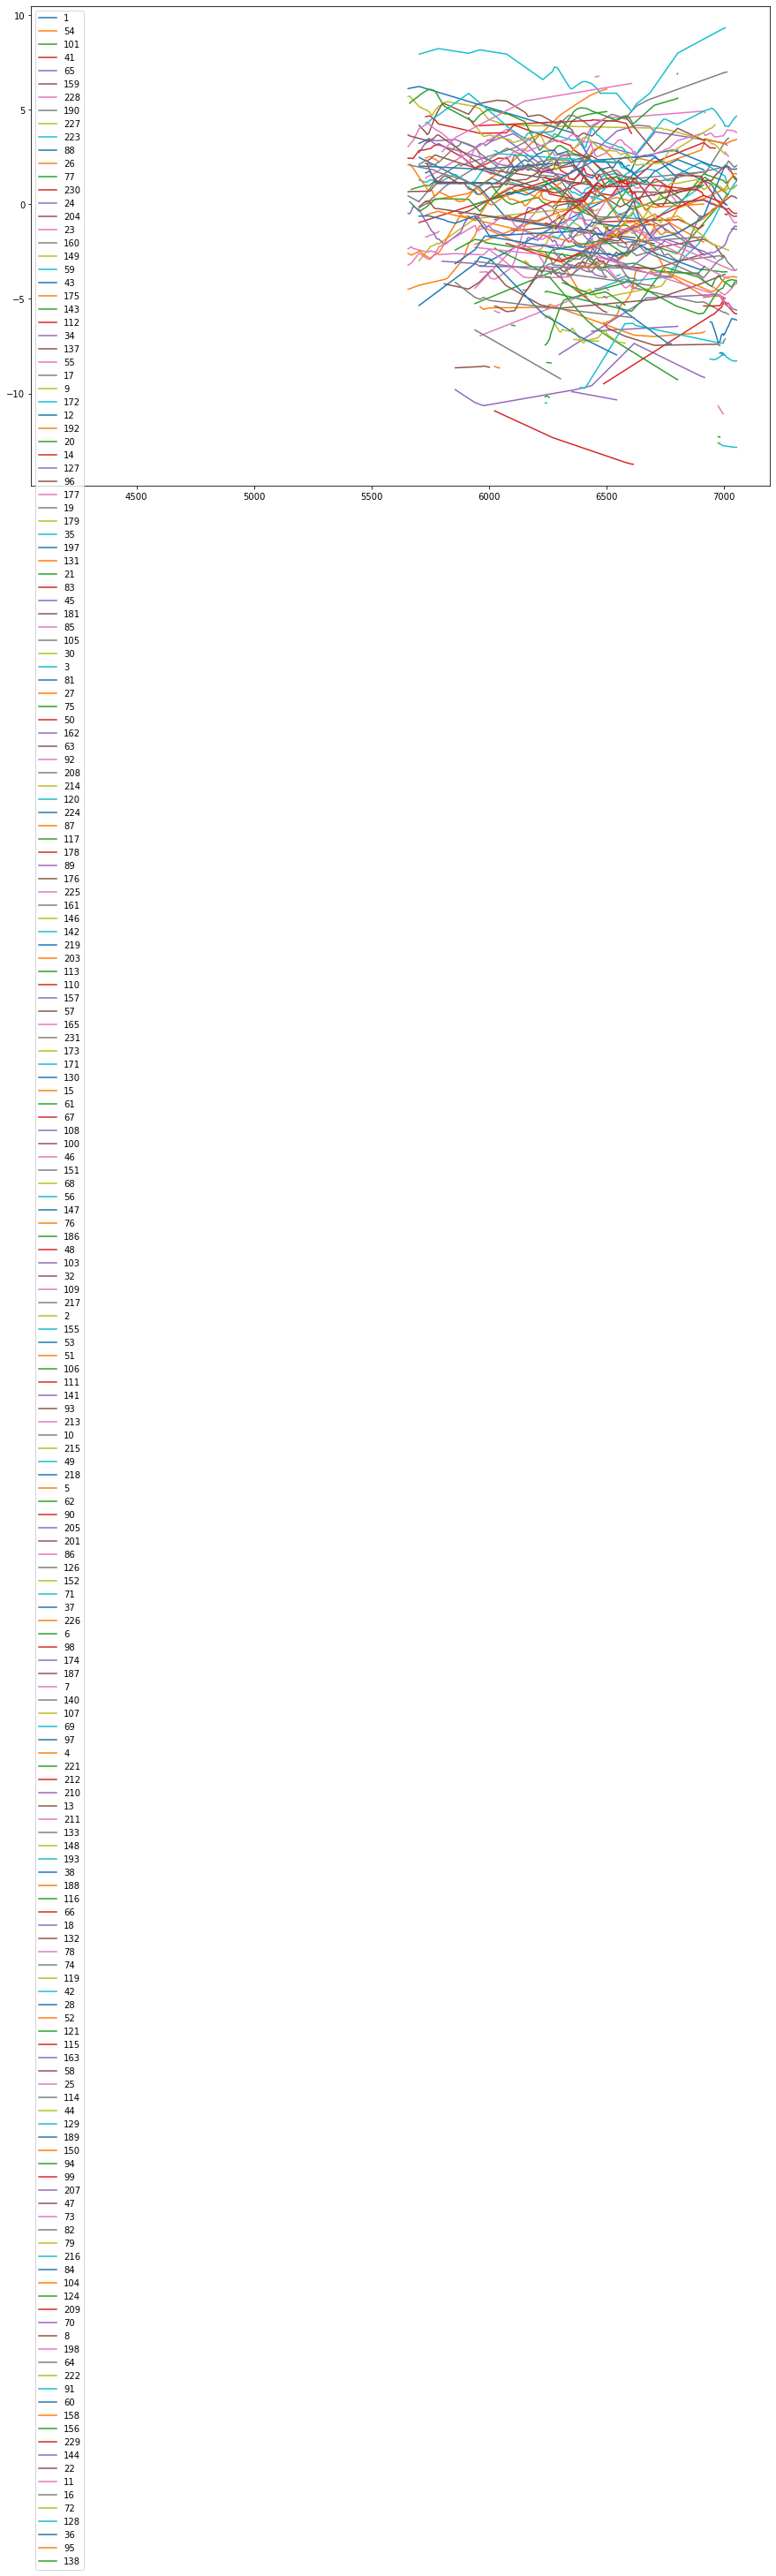

In [24]:
plt.figure(figsize=(15,10))
for id in df['id'].unique():
    lc_id = df[df['id'] == id]
    plt.plot(lc_id['day'], lc_id['mu'], label = id)
plt.legend()

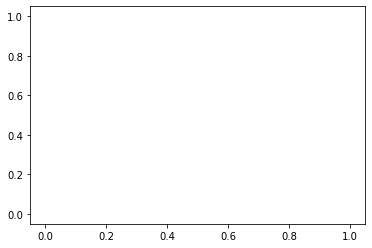

In [26]:
id = 53
lc_id = df[df['id'] == id]
plt.plot(lc_id['day'], lc_id['mu'], label = id)